# Data Exploration and Validation

In [1]:
#import the liberaries that we need for analysis
import pandas as pd                  #for dealing with dataframs
import numpy as np                   #for scientific compution and arraies
import matplotlib.pyplot as plt      #for visualization
%matplotlib inline

In [2]:
df = pd.read_csv("../input/noshowappointments/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [10]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Gender'}>

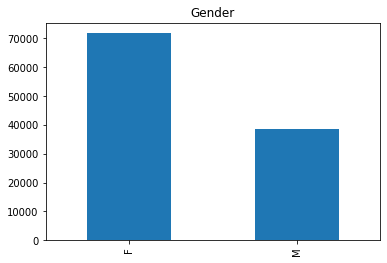

In [11]:
df['Gender'].value_counts().plot.bar(title='Gender')

In [12]:
df = df.replace({
    'Gender': {'M': 1, 'F': 0},
})

In [13]:
df = df.replace({ 'No-show': {'Yes': 1, 'No': 0},})

<AxesSubplot:title={'center':'SMS_received'}>

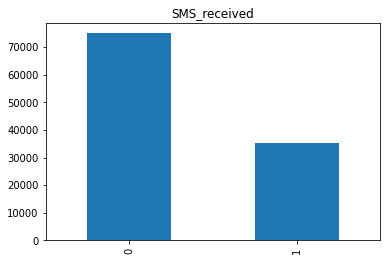

In [14]:
df['SMS_received'].value_counts().plot.bar(title='SMS_received')

<AxesSubplot:title={'center':'Scolarship'}>

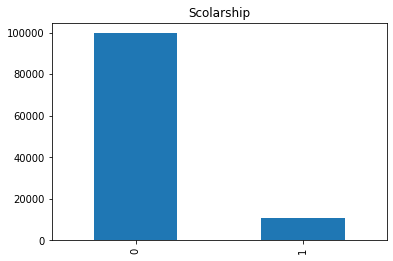

In [15]:
df['Scholarship'].value_counts().plot.bar(title='Scolarship')

In [16]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

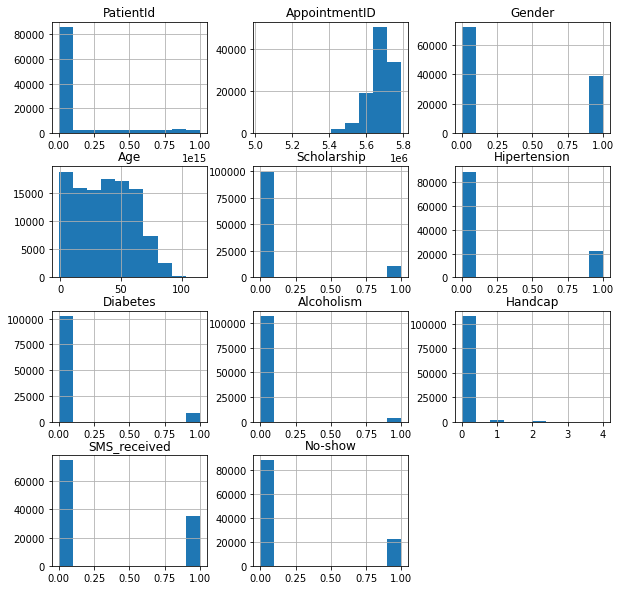

In [17]:
df.hist(figsize=(10,10));

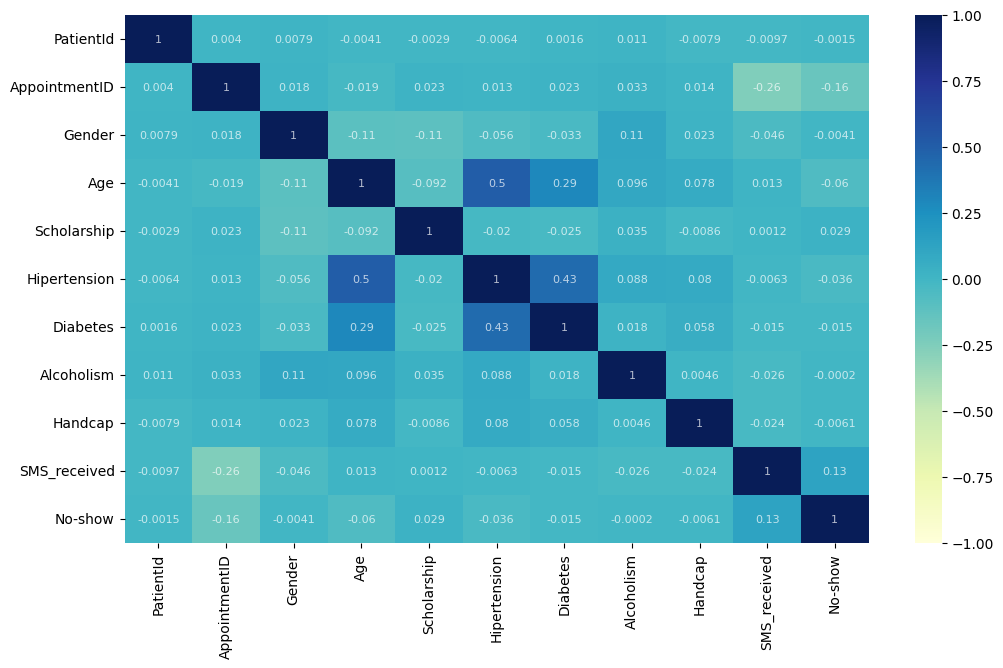

In [18]:
import seaborn as sns
plt.figure(figsize=(12, 7), dpi=100)
corr = df.corr()
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='YlGnBu', annot_kws={"size": 8, "color":'white', "alpha":0.7, "ha": 'center', "va": 'center'})

In [19]:
df['Age'] = [round(a,-1) for a in df['Age']]                     
df['Age'].value_counts()

40     15960
60     15628
20     15342
50     14012
30     13026
0      11732
10     11526
70      7365
80      4776
90      1090
100       65
120        5
Name: Age, dtype: int64

In [20]:
import plotly.express as px
fig = px.scatter(df['Age'].value_counts())
fig.show()

In [21]:
df['PatientId'].astype('int64')
df.set_index('AppointmentID', inplace = True)

In [22]:

#   How many times he books an appointment
df['PreviousApp'] = df.sort_values(by = ['PatientId','ScheduledDay']).groupby(['PatientId']).cumcount()  



# How many times he booked an appointment and didn't come
df['PreviousNoShow'] = (df[df['PreviousApp'] > 0].sort_values(['PatientId', 'ScheduledDay']).groupby(['PatientId'])
['No-show'].cumsum() / df[df['PreviousApp'] > 0]['PreviousApp'])

In [23]:
print(df['PreviousApp'])

AppointmentID
5642903    1
5642503    1
5642549    1
5642828    1
5642494    0
          ..
5651768    1
5650093    2
5630692    0
5630323    0
5629448    1
Name: PreviousApp, Length: 110527, dtype: int64


In [24]:
print(df['PreviousNoShow'])

AppointmentID
5642903    0.0
5642503    0.0
5642549    0.0
5642828    0.0
5642494    NaN
          ... 
5651768    0.0
5650093    0.0
5630692    NaN
5630323    NaN
5629448    0.0
Name: PreviousNoShow, Length: 110527, dtype: float64


In [25]:
df['PreviousNoShow'] = df['PreviousNoShow'].fillna(0)
df['PreviousNoShow']

AppointmentID
5642903    0.0
5642503    0.0
5642549    0.0
5642828    0.0
5642494    0.0
          ... 
5651768    0.0
5650093    0.0
5630692    0.0
5630323    0.0
5629448    0.0
Name: PreviousNoShow, Length: 110527, dtype: float64

In [ ]:
# Number of Appointments Missed by Patient
df['Num_App_Missed'] = df.groupby('PatientId')['No-show'].apply(lambda x: x.cumsum())
df['Num_App_Missed']

In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.strftime('%Y-%m-%d')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay']

In [ ]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.strftime('%Y-%m-%d')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay']

In [ ]:
df['Day_diff'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['Day_diff'].unique()

In [ ]:
import plotly.express as px
fig = px.scatter(df['Day_diff'].unique(),color=df['Day_diff'].unique())
fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# Crea una figura con sottotrame per ciascuna colonna
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
rows = int(np.ceil(len(numeric_columns) / 3))  # Tre grafici per riga
 
plt.figure(figsize=(15, rows * 5))
 
for i, col in enumerate(numeric_columns):
    # Calcolo IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    # Identifica outlier e dati normali
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    normal_data = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
 
    # Crea sottotrama
    plt.subplot(rows, 3, i + 1)
    plt.scatter(normal_data.index, normal_data[col], label="Dati Normali", color="skyblue", alpha=0.7)
    plt.scatter(outliers.index, outliers[col], label="Outlier", color="red", alpha=0.7)
    plt.title(col, fontsize=12)
    plt.xlabel("Indice", fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.legend(fontsize=8)
 
plt.tight_layout()
plt.show()
 

In [ ]:
# df = df[(df.Age >= 0)]
df = df[(df.Age >= 0) & (df.Age <= 100)]

In [ ]:
# drop columns after taking important info from them
df.drop(['ScheduledDay'], axis=1, inplace=True)
df.drop(['AppointmentDay'], axis=1, inplace=True)
df.drop('PatientId', axis=1,inplace = True)
df.drop('Neighbourhood', axis=1,inplace = True)

In [ ]:
#Convert to Categorical
df['Handcap'] = pd.Categorical(df['Handcap'])
print(df['Handcap'])

In [ ]:
#Convert to Dummy Variables
Handicap = pd.get_dummies(df['Handcap'], prefix = 'Handicap')
df = pd.concat([df, Handicap], axis=1)
df.drop(['Handcap'], axis=1, inplace = True)

In [ ]:
df.info()

In [ ]:
df.head()
df.to_csv('KaggleV2-May-2016-proccessed.csv', index = False, encoding='utf-8') # False: not include index

# ML Models

In [53]:
X_input = df.drop(columns=['No-show'])
y = df['No-show']


In [54]:
len(X_input.columns)

16

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_input)

### Undersampling

In [56]:
from collections import Counter
from imblearn.under_sampling import NearMiss
# Perform NearMiss undersampling to handle imbalanced data
print(f'Test dataset samples per class {Counter(y)}')
 
# Define the NearMiss undersampling object with a sampling strategy of 1 and all available CPU cores
nm = NearMiss(sampling_strategy=1, n_jobs=-1)
 
# Perform NearMiss undersampling on the feature matrix X and target variable y
X, y = nm.fit_resample(X, y)
 
# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y))

Test dataset samples per class Counter({0: 88206, 1: 22316})
Resampled dataset shape Counter({0: 22316, 1: 22316})


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



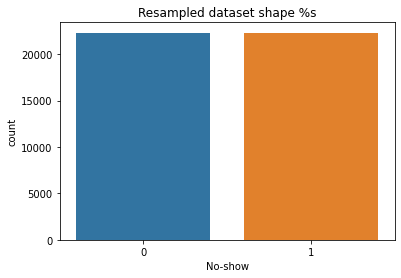

In [57]:
import seaborn as sns
 
# Assuming Resampled_dataset is your dataset
sns.countplot(y)
plt.title('Resampled dataset shape %s'.format(y.shape))
plt.show()

In [60]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 55.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [61]:
from pycaret.classification import *
 
exp = setup(data=X, target= y, session_id=786, fold=5, train_size=0.8)

,Description,Value
0,Session id,786
1,Target,No-show
2,Target type,Binary
3,Original data shape,"(44632, 17)"
4,Transformed data shape,"(44632, 17)"
5,Transformed train set shape,"(35705, 17)"
6,Transformed test set shape,"(8927, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [62]:
from pycaret.regression import *
exp.setup = RegressionExperiment()
 
# check the type of exp
type(exp.setup)

pycaret.regression.oop.RegressionExperiment

In [63]:
best = exp.compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

### KNN classification model

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)



print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('-------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (31242, 16)
y_train: (31242,)
-------------------------
X_test: (13390, 16)
y_test: (13390,)


In [65]:
# Train a KNN classification model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
params= {'weights' : ('uniform', 'distance'), 'n_neighbors':[60,70,80,90,100]}
clf = GridSearchCV(KNN, params)
clf.fit(X_train , y_train)
res=pd.DataFrame(clf.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005258,0.002038,3.380065,0.184458,60,uniform,"{'n_neighbors': 60, 'weights': 'uniform'}",0.846695,0.841575,0.845070,0.855634,0.843310,0.846457,0.004898,6
1,0.004255,0.000070,3.198853,0.164084,60,distance,"{'n_neighbors': 60, 'weights': 'distance'}",0.885902,0.882381,0.888764,0.891165,0.884763,0.886595,0.003072,1
2,0.004306,0.000084,3.342976,0.159588,70,uniform,"{'n_neighbors': 70, 'weights': 'uniform'}",0.839014,0.841895,0.840749,0.854513,0.838188,0.842872,0.005963,7
3,0.004222,0.000107,3.211890,0.152020,70,distance,"{'n_neighbors': 70, 'weights': 'distance'}",0.885422,0.881581,0.888124,0.890045,0.884443,0.885923,0.002937,2
4,0.004415,0.000164,3.368739,0.167963,80,uniform,"{'n_neighbors': 80, 'weights': 'uniform'}",0.837254,0.835174,0.839949,0.845871,0.831626,0.837975,0.004794,8
5,0.006864,0.001288,3.236737,0.154216,80,distance,"{'n_neighbors': 80, 'weights': 'distance'}",0.883981,0.881421,0.886684,0.891005,0.883643,0.885347,0.003286,3
6,0.004941,0.001278,3.378407,0.157898,90,uniform,"{'n_neighbors': 90, 'weights': 'uniform'}",0.827492,0.829253,0.833387,0.834987,0.827945,0.830613,0.003018,9
7,0.004900,0.000329,3.248485,0.151661,90,distance,"{'n_neighbors': 90, 'weights': 'distance'}",0.882541,0.881421,0.887164,0.889885,0.882843,0.884771,0.003218,4
8,0.004368,0.000259,3.361409,0.152733,100,uniform,"{'n_neighbors': 100, 'weights': 'uniform'}",0.823652,0.824292,0.832426,0.826825,0.814341,0.824307,0.005866,10
9,0.004972,0.000282,3.272547,0.163160,100,distance,"{'n_neighbors': 100, 'weights': 'distance'}",0.883341,0.881421,0.887964,0.888284,0.882042,0.884611,0.002937,5


In [68]:
clf.best_score_

0.886595125386515

In [69]:
clf.best_params_

{'n_neighbors': 60, 'weights': 'distance'}

In [70]:
from sklearn.metrics import accuracy_score
best_KNN = KNeighborsClassifier(weights='distance',n_neighbors=60)
best_KNN.fit(X_train , y_train)
y_pred_test = best_KNN.predict(X_test) 
KNN_acc = accuracy_score(y_test, y_pred_test)
print(KNN_acc)

0.8910380881254668


### Random Forest Classifier

In [58]:
from sklearn.model_selection import train_test_split
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state=0 , criterion= 'gini' , max_features='sqrt' , min_samples_split= 2 , n_estimators= 500) 
 # we will use GridSearch
rf.fit(X_train_rs , y_train_rs)

RandomForestClassifier(max_features='sqrt', n_estimators=500, random_state=0)

In [60]:
y_pred_rs = rf.predict(X_test_rs)

In [92]:
X_1 = scaler.fit_transform(X_test_rs)[0]
rf.predict(X_1.reshape(1,-1))

array([1])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



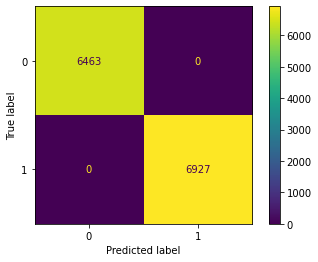

In [61]:
#Ploting confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_rs, y_pred_rs) 

In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
Cmatrix = confusion_matrix(y_test_rs, y_pred_rs)
print(Cmatrix)

[[6126  655]
 [ 337 6272]]


In [79]:
from sklearn.metrics import accuracy_score
RF_acc = accuracy_score(y_test_rs, y_pred_rs)

In [65]:
from sklearn.metrics import classification_report
rf_report = classification_report(y_test_rs, y_pred_rs)
print(rf_report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      6781
           1       0.91      0.95      0.93      6609

    accuracy                           0.93     13390
   macro avg       0.93      0.93      0.93     13390
weighted avg       0.93      0.93      0.93     13390



In [146]:
import time

import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.113 seconds


In [164]:
X_input.columns

Index(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'SMS_received', 'PreviousApp', 'PreviousNoShow',
       'Num_App_Missed', 'Day_diff', 'Handicap_0', 'Handicap_1', 'Handicap_2',
       'Handicap_3', 'Handicap_4'],
      dtype='object')

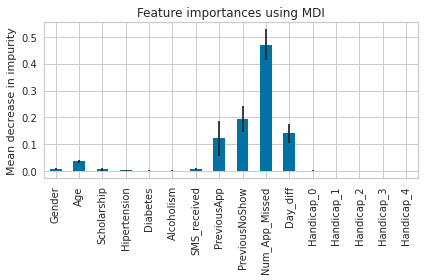

In [165]:
import pandas as pd

forest_importances = pd.Series(importances, index=X_input.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### save the model scaler and encider Pickle files

In [197]:
import pickle

# Assuming you have a model named 'model', a scaler named 'scaler', and an encoder named 'encoder'

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the encoder to a file
#with open('encoder.pkl', 'wb') as f:
#    pickle.dump(encoder, f)

### Decision Trees


In [166]:
# Spliting data into training set and testing set for DT
from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [167]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train_dt , y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [168]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test_dt)

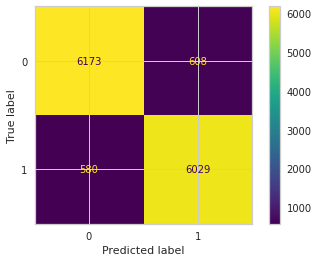

In [169]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_dt, X_test_dt, y_test_dt) 

In [170]:
DT_acc = accuracy_score(y_test_dt, y_pred_dt)

In [171]:
# Accuracy

from sklearn.metrics import classification_report
print(classification_report(y_test_dt, y_pred_dt))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6781
           1       0.91      0.91      0.91      6609

    accuracy                           0.91     13390
   macro avg       0.91      0.91      0.91     13390
weighted avg       0.91      0.91      0.91     13390



### Logistic Regression.


In [173]:
from sklearn.model_selection import train_test_split
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [174]:

### Logistic regrission
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_lg = LogisticRegression().fit(X_train_lg, y_train_lg)
y_pred_lg = model_lg.predict(X_test_lg)
acc_lg = model_lg.score(X_train_lg, y_train_lg)

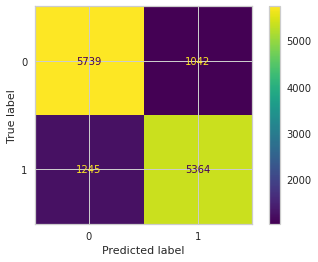

In [175]:
# Ploting confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_lg, X_test_lg, y_test_lg) 

In [176]:
from sklearn.metrics import accuracy_score
LG_acc = accuracy_score(y_test_lg, y_pred_lg)

In [177]:
# Accuracy

from sklearn.metrics import classification_report
print(classification_report(y_test_lg, y_pred_lg))



              precision    recall  f1-score   support

           0       0.82      0.85      0.83      6781
           1       0.84      0.81      0.82      6609

    accuracy                           0.83     13390
   macro avg       0.83      0.83      0.83     13390
weighted avg       0.83      0.83      0.83     13390



#### permutation importance with sklearn

In [189]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    model_lg, 
    X_test, # we use the test set
    y_test,
    scoring= "r2", # we can use any metric
    n_repeats=5, 
    random_state=0,
)

In [190]:
importance = pd.DataFrame(
    {"importance_mean": perm["importances_mean"],
     "importance_std": perm["importances_std"]},
    index=X_input.columns)

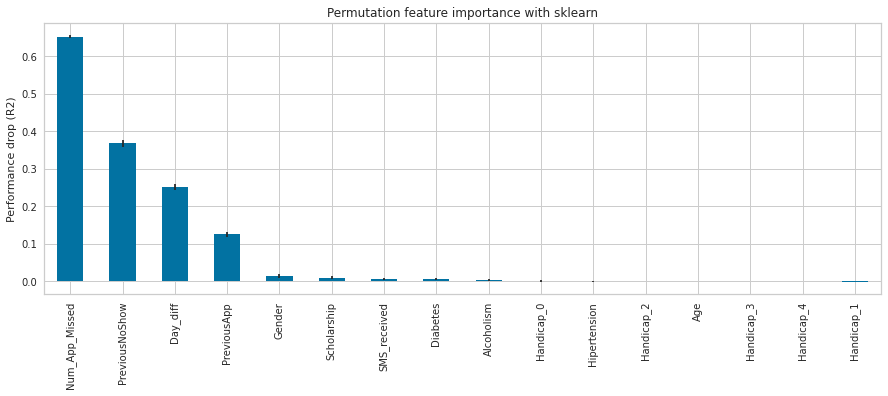

In [191]:
importance["importance_mean"].sort_values(
    ascending=False
).plot(figsize=(15, 5), kind="bar", yerr=importance["importance_std"])
plt.title("Permutation feature importance with sklearn")
plt.ylabel("Performance drop (R2)")
plt.show()

#### Permutation Feature Importance with ELI5


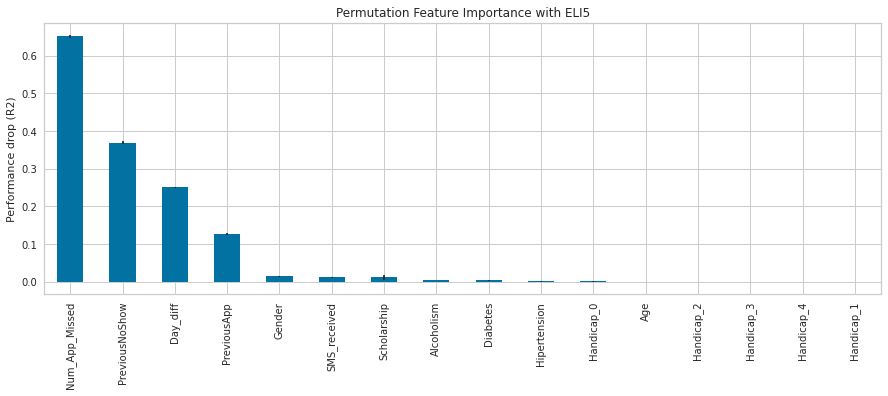

In [187]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel

perm = PermutationImportance(
    model_lg,
    scoring="r2",
    n_iter=3,  # number of times each feature is shuffled
    cv="prefit",
    random_state=5,
)
perm.fit(X_test, y_test) 

importance = pd.DataFrame({
    "importance": perm.feature_importances_,
    "std": perm.feature_importances_std_,
    },
    index = X_input.columns.to_list()
)

importance["importance"].sort_values(
    ascending=False
).plot(figsize=(15, 5), kind="bar", yerr=importance["std"])
plt.title("Permutation Feature Importance with ELI5")
plt.ylabel("Performance drop (R2)")
plt.show()

### Support Vector Machine.

In [73]:
# Spliting data into training set and testing set 
from sklearn.model_selection import train_test_split
X_train_sv, X_test_sv, y_train_sv, y_test_sv = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
SVC_model = make_pipeline(StandardScaler(),SVC(gamma='auto'))
SVC_model.fit(X_train_sv, y_train_sv)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [75]:
# Predicting the Test set results
y_pred_sv = SVC_model.predict(X_test_sv)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



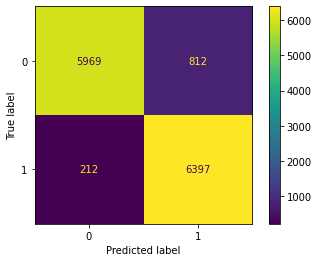

In [76]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SVC_model, X_test_sv, y_test_sv) 

In [78]:
from sklearn.metrics import accuracy_score
SV_acc = accuracy_score(y_test_sv, y_pred_sv)

In [ ]:

# Accuracy

from sklearn.metrics import classification_report
print(classification_report(y_test_sv, y_pred_sv))



#### ML flow

In [ ]:
!pip install mlflow

In [72]:
rf_report

'              precision    recall  f1-score   support\n\n           0       0.95      0.90      0.93      6781\n           1       0.91      0.95      0.93      6609\n\n    accuracy                           0.93     13390\n   macro avg       0.93      0.93      0.93     13390\nweighted avg       0.93      0.93      0.93     13390\n'

In [80]:
import mlflow
#mlflow.start_run()

#mlflow.log_param("RandomForest",rf)

#mlflow.log_metric("accuracy", RF_acc)

mlflow.end_run()

In [ ]:
!mlflow ui

[2025-01-17 01:21:54 +0000] [263] [INFO] Starting gunicorn 20.1.0
[2025-01-17 01:21:54 +0000] [263] [INFO] Listening at: http://127.0.0.1:5000 (263)
[2025-01-17 01:21:54 +0000] [263] [INFO] Using worker: sync
[2025-01-17 01:21:54 +0000] [266] [INFO] Booting worker with pid: 266


# Conclusion

In [ ]:
!pip3 install tabulate
from tabulate import tabulate

In [ ]:
tab= tabulate([["Model","Accuracy"],["KNN",KNN_acc*100],["Random Forest Classifier",RF_acc*100],['Decision Tree',
                DT_acc*100],['logestic regression',LG_acc*100],['Support Vector classifier',SV_acc*100]],
              headers="firstrow")
print(tab)

# best  models are **Support Vector Classifier** and **Random Forest Classifier** with acc **96%**